In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [119]:
df = pd.read_excel('Superstore.xlsx')

In [120]:
print (df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [121]:
# ( Task ) Data loading and overview

orders = pd.read_excel('Superstore.xlsx', sheet_name="Orders")
returns = pd.read_excel('Superstore.xlsx', sheet_name="Returns")
people = pd.read_excel('Superstore.xlsx', sheet_name="People")

# Looking at first 5 records
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [122]:
returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [123]:
people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [124]:
# Print the columns contained in the data
print("Orders columns: ")
print(list(orders.columns))
print()

print("Returns columns: ")
print(list(returns.columns))
print()

print("People columns: ")
print(list(people.columns))

Orders columns: 
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Returns columns: 
['Returned', 'Order ID']

People columns: 
['Person', 'Region']


In [125]:
# Print attributes like count, mean, max, min, standard deviation, etc
print(f"No. of rows in orders data: {orders['Row ID'].count() + 1}")
print()
      
print(f"No. of rows in returned data: {returns['Returned'].count() + 1}")
print()
      
print(f"No. of rows in person data: {people['Person'].count() + 1}")

No. of rows in orders data: 9995

No. of rows in returned data: 297

No. of rows in person data: 5


In [126]:
print(f"Mean of profit in orders data: {orders['Profit'].mean()}")
print()

print(f"Max of profit in orders data: {orders['Profit'].max()}")
print()
      
print(f"Min of profit in orders data: {orders['Profit'].min()}")
print()

Mean of profit in orders data: 28.6568963077848

Max of profit in orders data: 8399.975999999999

Min of profit in orders data: -6599.978000000001



In [127]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [128]:
df.shape

(9994, 21)

In [129]:
df.dropna(how='any').shape


(9994, 21)

In [130]:
df.dropna(how='all').shape

(9994, 21)

In [131]:
df.dropna(subset=['Customer Name'],how='all').shape

(9994, 21)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [133]:
#Description about Data
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [134]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [135]:
#Sum of sales and profit
df['Sales'].sum()

2297200.8603000003

In [136]:
df['Profit'].sum()

286397.0216999999

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

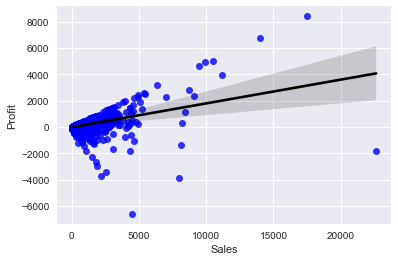

In [137]:
#Visualisation of data
#Scatter plot sales vs profit
sns.regplot(x='Sales',y='Profit', data=df, scatter_kws={"color":"blue"}, line_kws={"color":"black"})

In [138]:
#finding correlation between profit and sales
plt.rcParams['figure.figsize'] = (15,6)

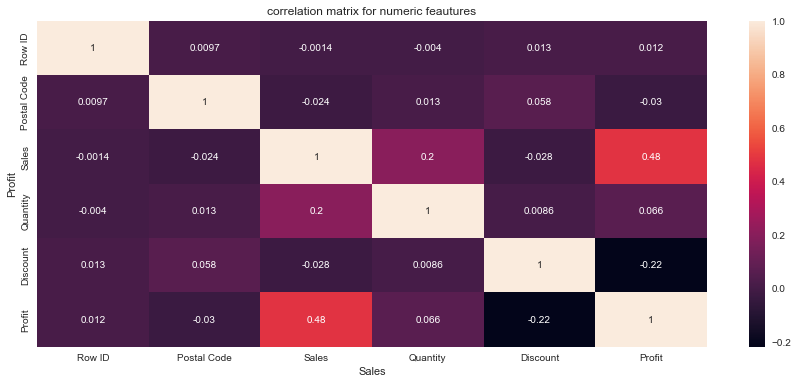

In [139]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation matrix for numeric feautures')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.show()

#if we analyze through correlation coefficient, it's 48% between sales and profit. Consider as weak correlation, it means there are factors which are affecting profit.

In [140]:
#removing unneccesary column 

In [141]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [142]:
#removing unnecessary column such as postal code

In [143]:
df = df.drop(['Postal Code'],axis=1)

In [144]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


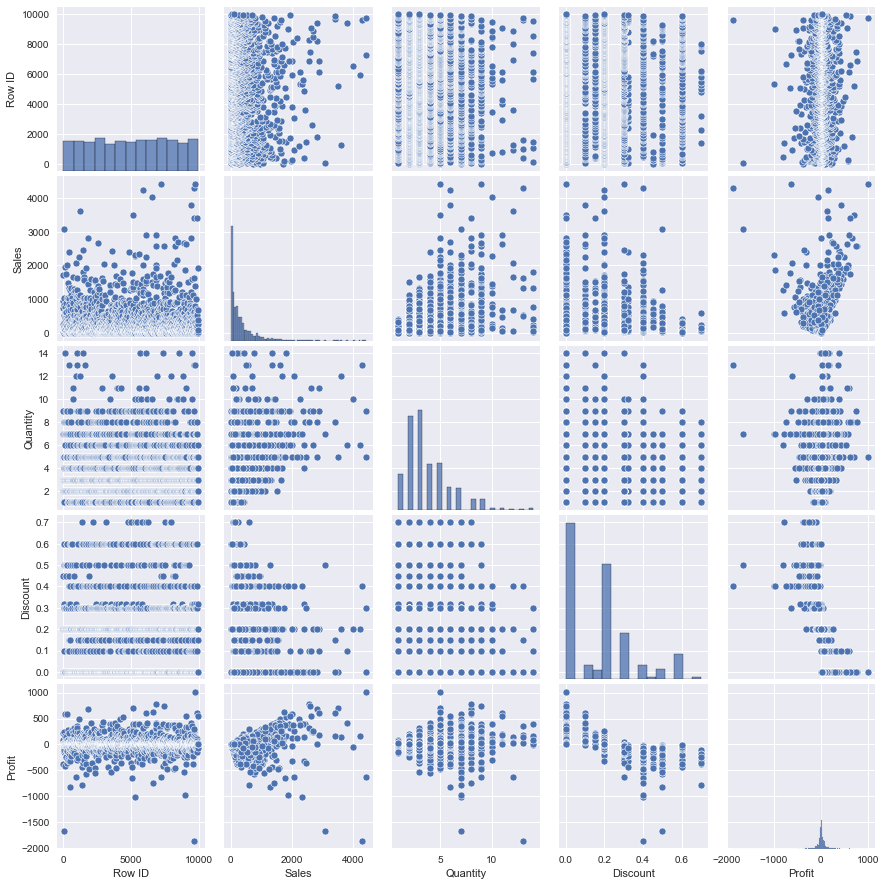

In [182]:
sns.pairplot(df)

In [183]:
#category wise sales and profit

C:\Users\Lebogang.Langa\AppData\Local\Temp\ipykernel_24592\2942222252.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<AxesSubplot:xlabel='Category'>

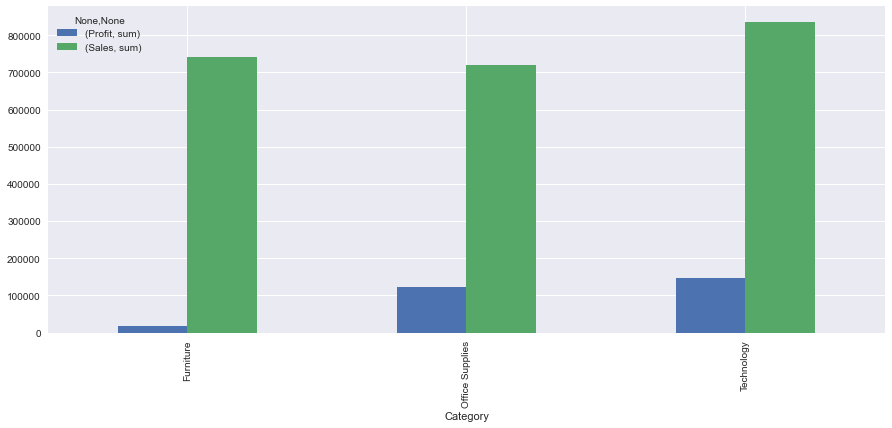

In [147]:
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()

<AxesSubplot:ylabel='Sub-Category'>

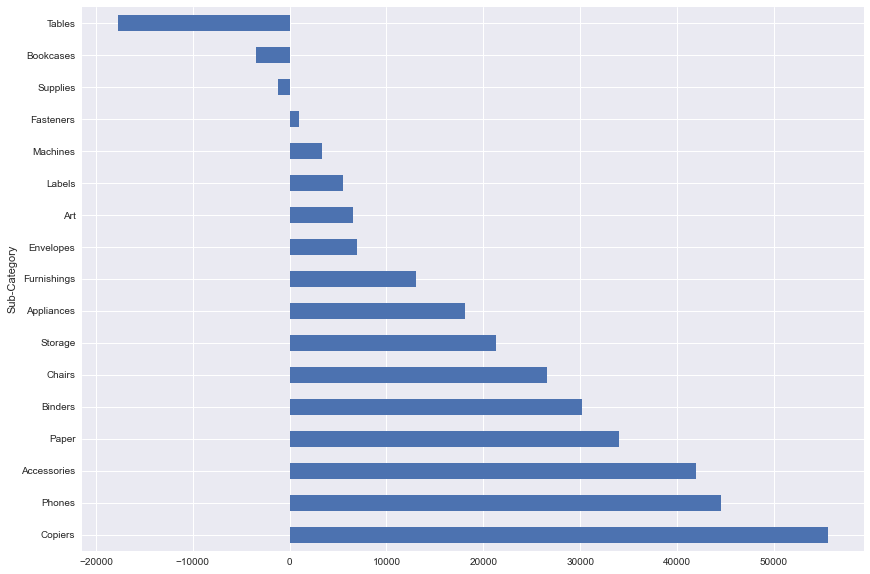

In [148]:
#further divide the category into sub category and then analyze
plt.figure(figsize=(14,10))
statewise=df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() # h for horizontal

#Furniture is making a loss


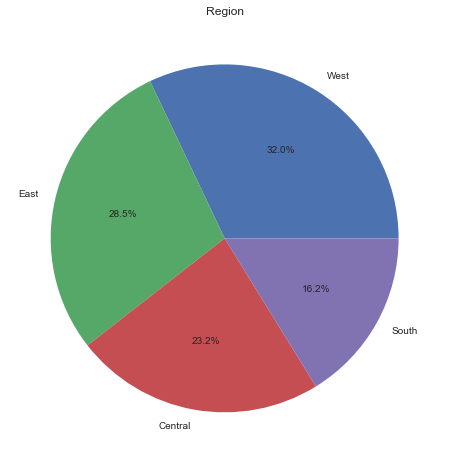

In [149]:
#no of customers region wise
plt.figure(figsize=(8,8))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()




In [150]:
#Region Wise Profit distribution
df.groupby('Region').sum()['Sales']

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

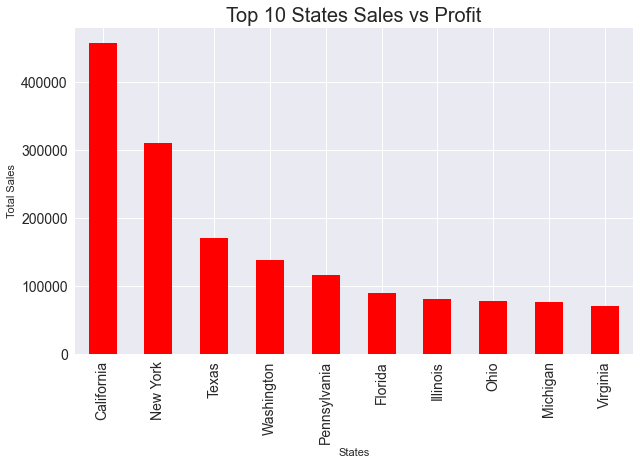

In [151]:
top_states_s=df.groupby("State").Sales.sum().nlargest(n=10)

top_states_p=df.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_states_s.plot(kind= 'bar', figsize=(10,6), fontsize=14)
top_states_s.plot(kind= 'bar', figsize=(10,6), fontsize=14, color='red')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.title ('Top 10 States Sales vs Profit', fontsize=20)
plt.show()

#sales are mainly concentrated in 3 states. Company needs to focus on selling in the lower selling areas.



In [152]:
df.groupby('State').sum()['Sales'].reset_index()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


In [153]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [154]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [155]:
df['Customer Name'].value_counts()

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64

In [156]:
# Select Furniture
df  = df[df.Category == 'Furniture']

In [157]:

model_data = df.groupby(['Order Date'])['Sales'].sum().reset_index()

In [158]:
model_data['Order Date'] = pd.to_datetime(model_data['Order Date'])

In [159]:
# create feature from order_date columns
def create_date_features(dataframe):
    dataframe['month'] = dataframe['Order Date'].dt.month
    dataframe['day_of_month'] = dataframe['Order Date'].dt.day
    dataframe['day_of_year'] = dataframe['Order Date'].dt.dayofyear
    dataframe['week_of_year'] = dataframe['Order Date'].dt.week
    dataframe['day_of_week'] = dataframe['Order Date'].dt.dayofweek + 1
    dataframe['year'] = dataframe['Order Date'].dt.year
    dataframe['is_wknd'] = dataframe['Order Date'].dt.weekday // 4
    dataframe['is_month_start'] = dataframe['Order Date'].dt.is_month_start.astype(int)
    dataframe['is_month_end'] = dataframe['Order Date'].dt.is_month_end.astype(int)
    dataframe['quarter'] = dataframe['Order Date'].dt.quarter
    dataframe['week_of_month'] = dataframe['week_of_year'].values // 4.35
    return dataframe

In [160]:
# apply create date
model_data = create_date_features(model_data)

C:\Users\Lebogang.Langa\AppData\Local\Temp\ipykernel_24592\1727326768.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataframe['week_of_year'] = dataframe['Order Date'].dt.week


In [161]:
model_data.head()

,Order Date,Sales,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,quarter,week_of_month
0,2014-01-06,2573.820,1,6,6,2,1,2014,0,0,0,1,0.0
1,2014-01-07,76.728,1,7,7,2,2,2014,0,0,0,1,0.0
2,2014-01-10,51.940,1,10,10,2,5,2014,1,0,0,1,0.0
3,2014-01-11,9.940,1,11,11,2,6,2014,1,0,0,1,0.0
4,2014-01-13,879.939,1,13,13,3,1,2014,0,0,0,1,0.0


In [162]:
model_data['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [163]:
model_data['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

### Creating Persistence Model

In [164]:
sales_table = model_data[['Order Date', 'Sales']]

In [165]:
# Create lagged dataset
values = pd.DataFrame(sales_table.Sales)
persistence = pd.concat([values.shift(1), values], axis=1)
persistence.columns = ['t-1', 't+1']
persistence.head(5)

,t-1,t+1
0,NaN,2573.820
1,2573.820,76.728
2,76.728,51.940
3,51.940,9.940
4,9.940,879.939


In [187]:
# persistence model
def model_persistence(x):
	return x

In [167]:
# split into train and test sets
X = persistence.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [168]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
test_score = np.sqrt(test_score)
print('Test RMSE: %.3f' % test_score)

Test RMSE: 1467.884


##### Decision Tree Data

In [191]:
model_data.set_index('OrderDate', inplace=True)

KeyError: "None of ['OrderDate'] are in the columns"

In [ ]:
## Get Features As X
X = model_data.loc[:, model_data.columns != 'Sales']
X = X.loc[:, X.columns != 'Order Date']

y = model_data.loc[:, model_data.columns == 'Sales']

In [ ]:

X_test = X.loc['2017-04-01':'2017-12-30'] 
X_train = X.loc[:'2017-03-31']
y_test = y.loc['2017-04-01':'2017-12-30']
y_train = y.loc[:'2017-03-31']

In [ ]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

In [173]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)

In [ ]:
dt_test_score = mean_squared_error(y_test, y_pred)

In [ ]:
rsme_dt = np.sqrt(dt_test_score)

##### Random Forrest

In [189]:
rf_regressor = RandomForestRegressor()

# fit the regressor with X and Y data
rf_regressor.fit(X_train, y_train)

# test the output by changing values, like 3750
y_pred = rf_regressor.predict(X_test)

C:\Users\Lebogang.Langa\AppData\Local\Temp\ipykernel_24592\4035049867.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [190]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 707.2202454142857
Mean Squared Error: 1050411.0523368015
Root Mean Squared Error: 1024.895629972536


In [178]:
rf_test_score = mean_squared_error(y_test, y_pred)

In [179]:
rf_test_score = np.sqrt(rf_test_score)
rf_test_score  

1039.837679880998

In [180]:
np.mean(model_data['Sales'])

834.6454390326206

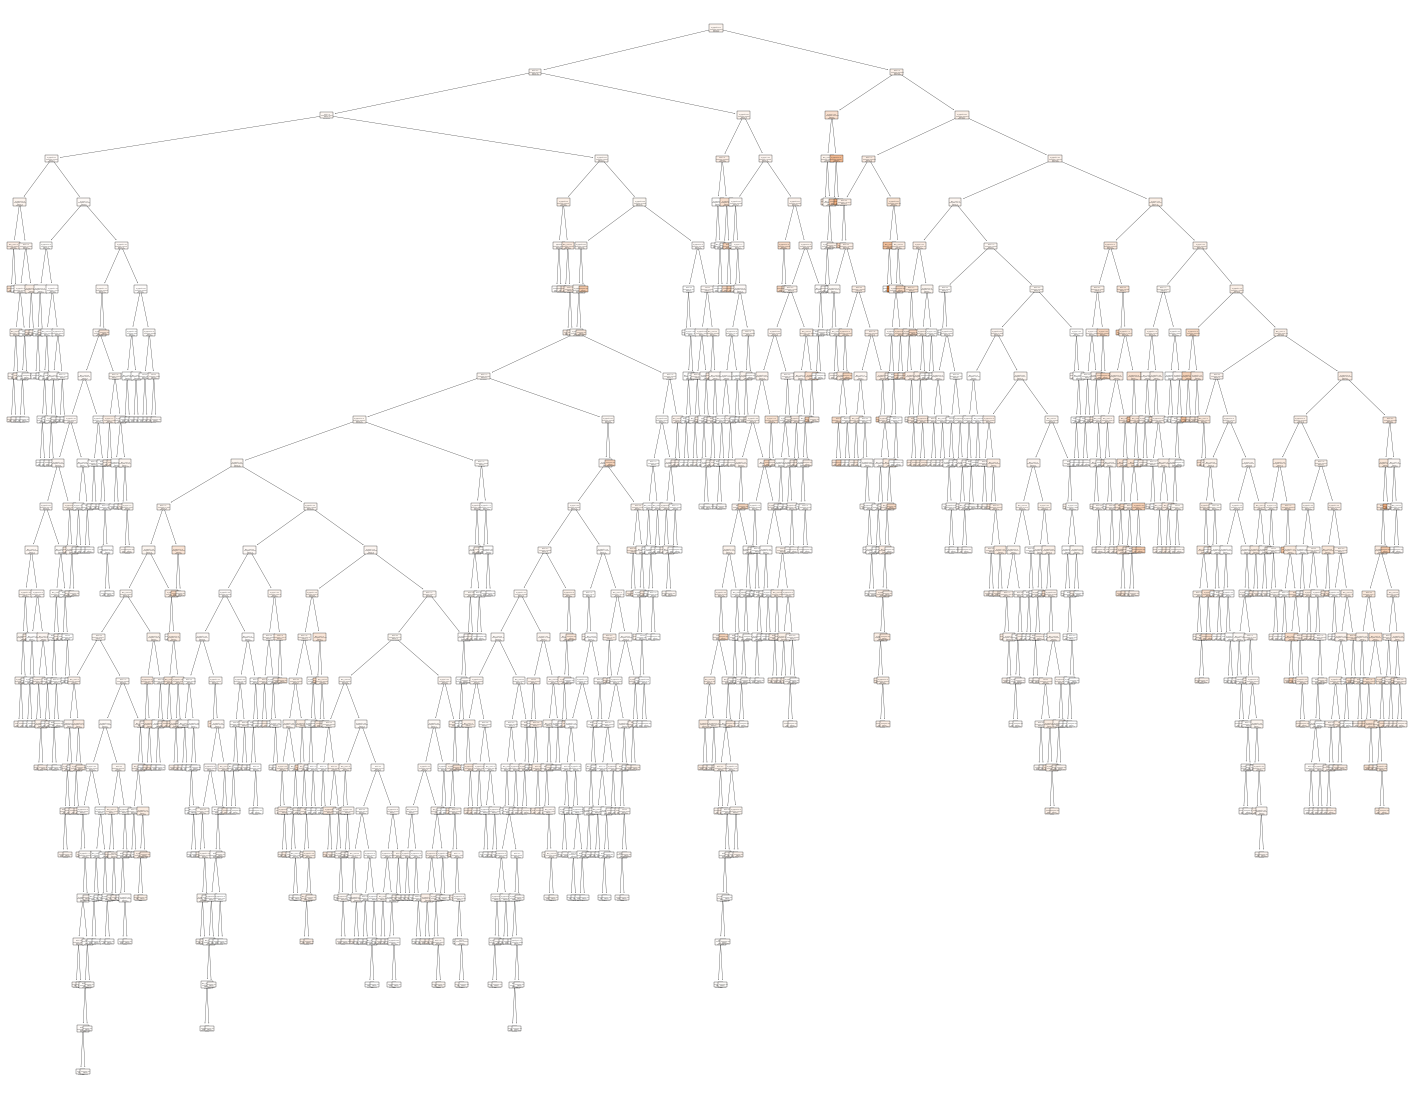

In [186]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True, feature_names=model_data.columns.values)

### 